In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../data/SeoulBikeData.csv",encoding="latin1")
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df = df.rename(columns={
    'Date': 'date',
    'Rented Bike Count': 'rented_bike_count',
    'Hour': 'hour',
    'Temperature(°C)': 'temperature_c',
    'Humidity(%)': 'humidity',
    'Wind speed (m/s)': 'wind_speed',
    'Visibility (10m)': 'visibility_10m',
    'Dew point temperature(°C)': 'dew_point_c',
    'Solar Radiation (MJ/m2)': 'solar_radiation',
    'Rainfall(mm)': 'rainfall_mm',
    'Snowfall (cm)': 'snowfall_cm',
    'Seasons': 'season',
    'Holiday': 'holiday',
    'Functioning Day': 'functioning_day'
})

In [4]:
df.head()

,date,rented_bike_count,hour,temperature_c,humidity,wind_speed,visibility_10m,dew_point_c,solar_radiation,rainfall_mm,snowfall_cm,season,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rented_bike_count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
temperature_c,8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
humidity,8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
wind_speed,8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
visibility_10m,8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
dew_point_c,8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
solar_radiation,8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
rainfall_mm,8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [10]:
num_features=df.select_dtypes(exclude='object')
cat_features=df.select_dtypes(include='object')
print("Num_Features:",num_features.columns)
print("*"*100)
print('Cat_Features:',cat_features.columns)

Num_Features: Index(['rented_bike_count', 'hour', 'temperature_c', 'humidity', 'wind_speed',
       'visibility_10m', 'dew_point_c', 'solar_radiation', 'rainfall_mm',
       'snowfall_cm'],
      dtype='object')
****************************************************************************************************
Cat_Features: Index(['date', 'season', 'holiday', 'functioning_day'], dtype='object')


In [11]:
cat_features.head()

,date,season,holiday,functioning_day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes
3,01/12/2017,Winter,No Holiday,Yes
4,01/12/2017,Winter,No Holiday,Yes


In [13]:
for col in cat_features.columns[:]:
    print("\n")
    print(df[col].value_counts())



date
01/12/2017    24
09/08/2018    24
07/08/2018    24
06/08/2018    24
05/08/2018    24
              ..
31/03/2018    24
30/03/2018    24
29/03/2018    24
28/03/2018    24
30/11/2018    24
Name: count, Length: 365, dtype: int64


season
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64


holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64


functioning_day
Yes    8465
No      295
Name: count, dtype: int64


In [18]:
# Convert 'date' column to datetime type
#cat_features.info()
df['date']=pd.to_datetime(df['date'],format='%d/%m/%Y')
# Create new datetime features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['day_name'] = df['date'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin([5, 6])  # Saturday=5, Sunday=6

In [19]:
df.head()

,date,rented_bike_count,hour,temperature_c,humidity,wind_speed,visibility_10m,dew_point_c,solar_radiation,rainfall_mm,snowfall_cm,season,holiday,functioning_day,year,month,day,day_of_week,day_name,is_weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,Friday,False
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,Friday,False
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,Friday,False
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,Friday,False
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4,Friday,False


/tmp/ipykernel_24/2377874546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


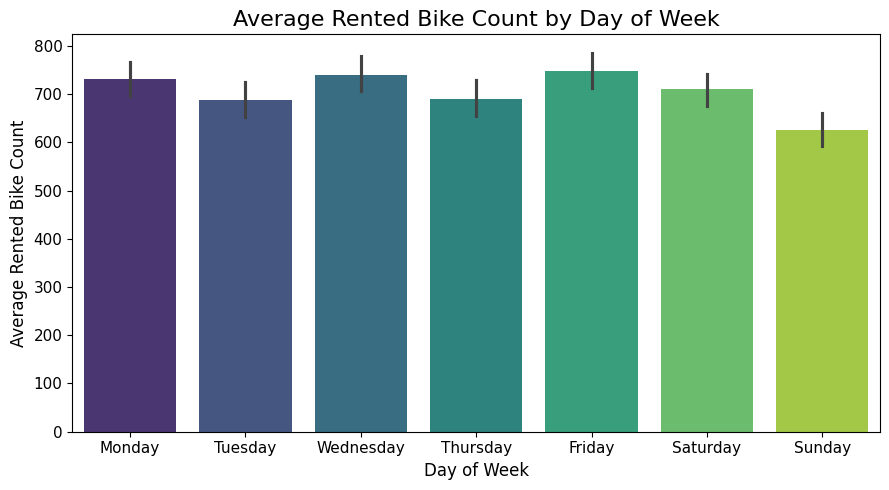

In [28]:
# 1. Average rented bike count by day of week
plt.figure(figsize=(9,5))
sns.barplot(
    x='day_name',y='rented_bike_count',data=df,
    estimator='mean',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    palette='viridis'
)
plt.title('Average Rented Bike Count by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Rented Bike Count', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

/tmp/ipykernel_24/4192792823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


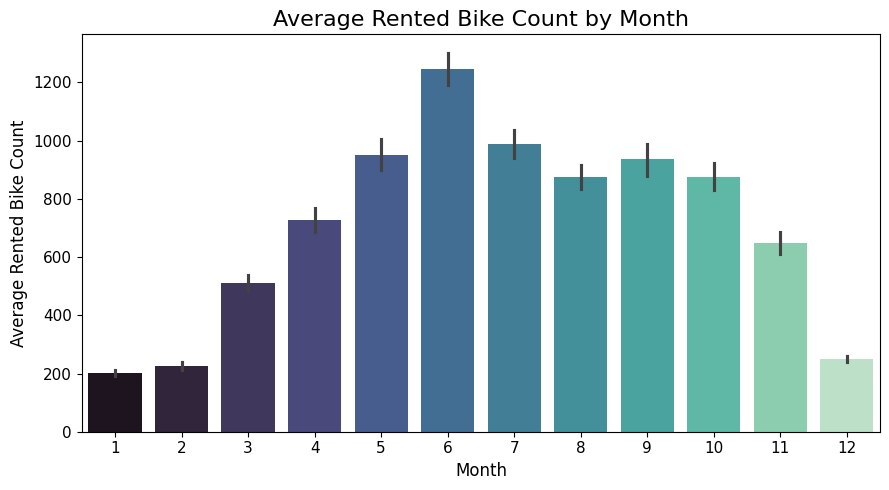

In [29]:
# 2. Average rented bike count by month
plt.figure(figsize=(9, 5))
sns.barplot(
    x='month', y='rented_bike_count', data=df, 
    estimator='mean', 
    palette='mako'
)
plt.title('Average Rented Bike Count by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Rented Bike Count', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

/tmp/ipykernel_24/1788058852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


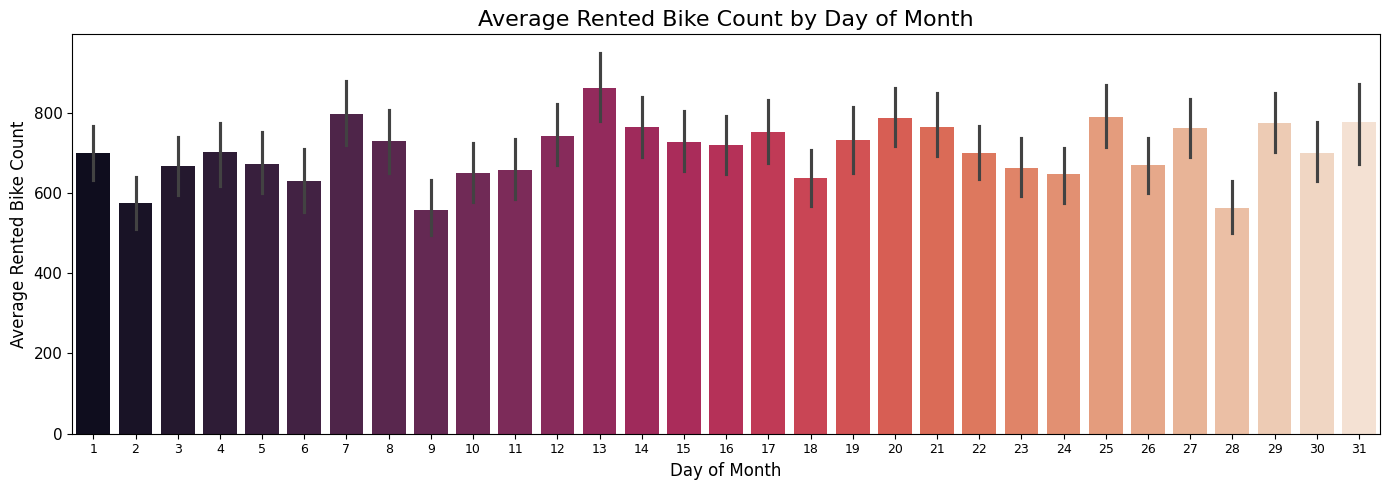

In [30]:
# 3. Average rented bike count by day of month
plt.figure(figsize=(14, 5))
sns.barplot(
    x='day', y='rented_bike_count', data=df, 
    estimator='mean', 
    palette='rocket'
)
plt.title('Average Rented Bike Count by Day of Month', fontsize=16)
plt.xlabel('Day of Month', fontsize=12)
plt.ylabel('Average Rented Bike Count', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

/tmp/ipykernel_24/1666450893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


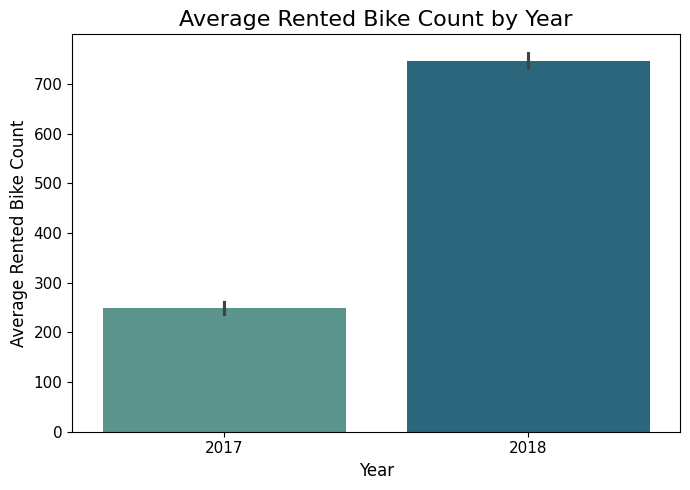

In [31]:
# 4. Average rented bike count by year (if you have multiple years)
plt.figure(figsize=(7, 5))
sns.barplot(
    x='year', y='rented_bike_count', data=df, 
    estimator='mean', 
    palette='crest'
)
plt.title('Average Rented Bike Count by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rented Bike Count', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


/tmp/ipykernel_24/2557485417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


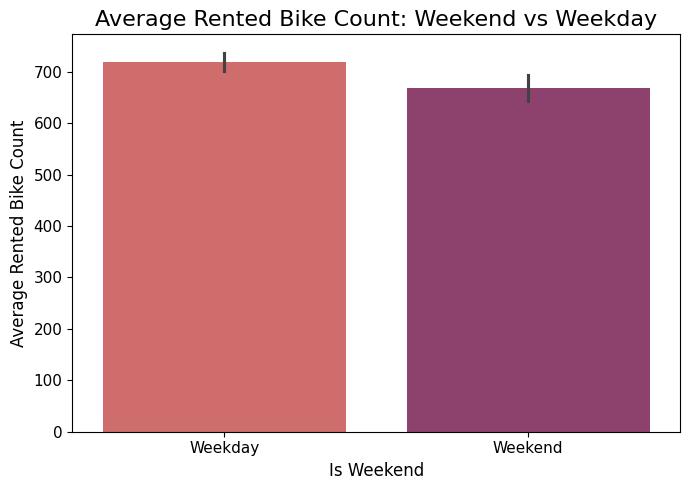

In [32]:
# 5. Average rented bike count: Weekend vs Weekday
plt.figure(figsize=(7, 5))
sns.barplot(
    x='is_weekend', y='rented_bike_count', data=df, 
    estimator='mean', 
    palette='flare'
)
plt.title('Average Rented Bike Count: Weekend vs Weekday', fontsize=16)
plt.xlabel('Is Weekend', fontsize=12)
plt.ylabel('Average Rented Bike Count', fontsize=12)
plt.xticks([0, 1], ['Weekday', 'Weekend'], fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

/tmp/ipykernel_24/2543853295.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


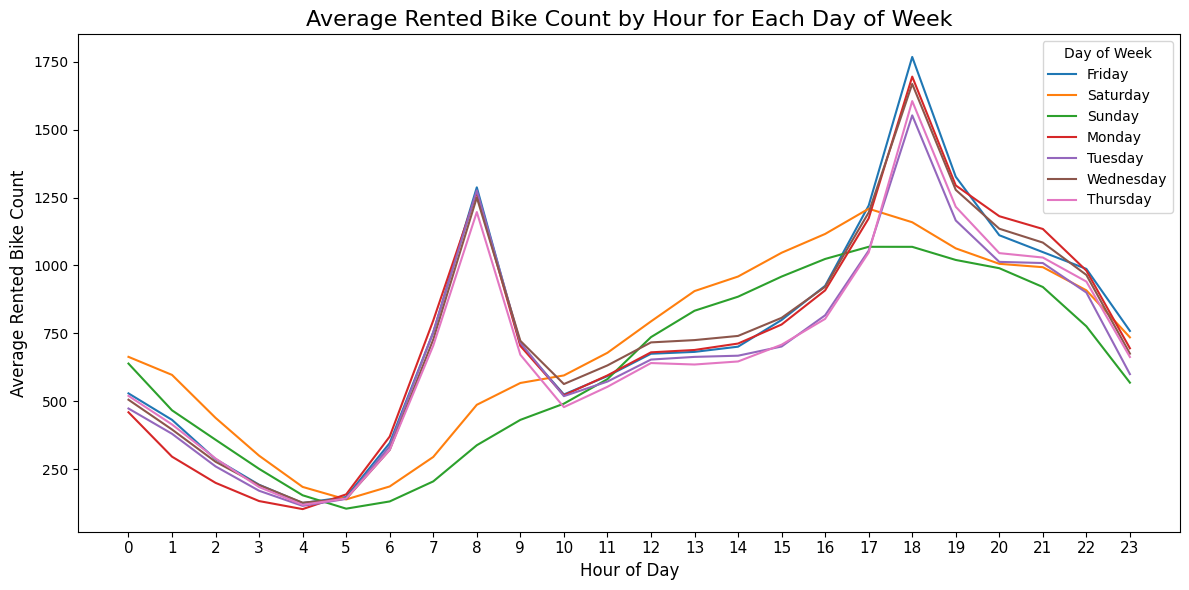

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='hour', y='rented_bike_count', hue='day_name', 
    data=df, estimator='mean', ci=None, palette='tab10'
)
plt.title('Average Rented Bike Count by Hour for Each Day of Week', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Rented Bike Count', fontsize=12)
plt.legend(title='Day of Week')
plt.xticks(range(0, 24), fontsize=11) 
plt.tight_layout()
plt.show()

/tmp/ipykernel_24/4178342872.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


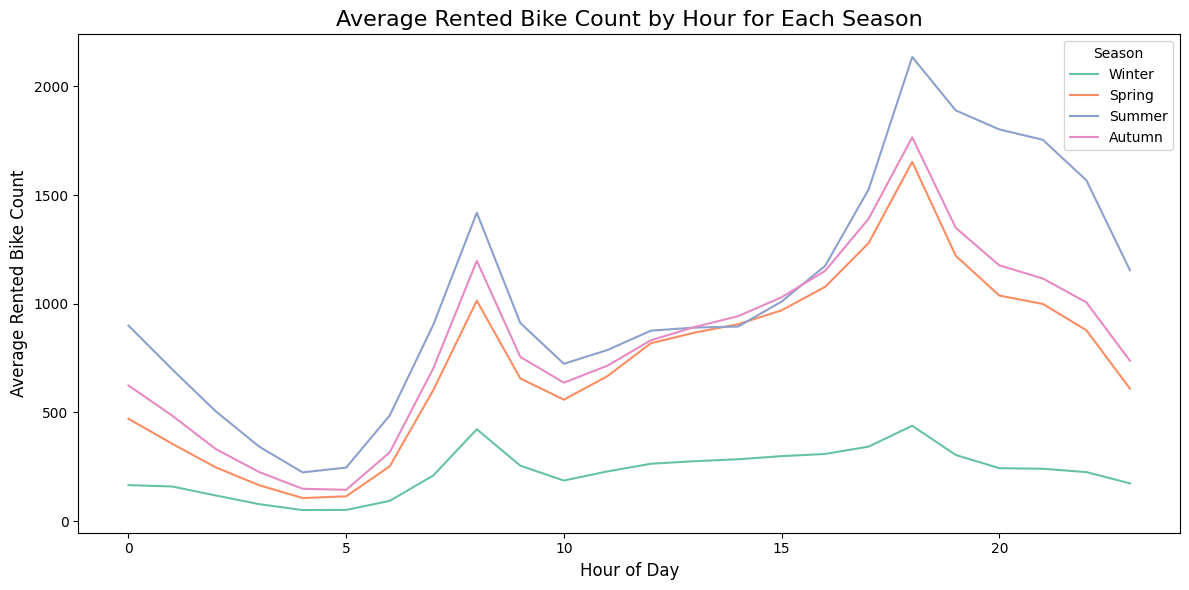

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='hour', y='rented_bike_count', hue='season', 
    data=df, estimator='mean', ci=None, palette='Set2'
)
plt.title('Average Rented Bike Count by Hour for Each Season', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Rented Bike Count', fontsize=12)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

In [41]:
num_features

,rented_bike_count,hour,temperature_c,humidity,wind_speed,visibility_10m,dew_point_c,solar_radiation,rainfall_mm,snowfall_cm
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


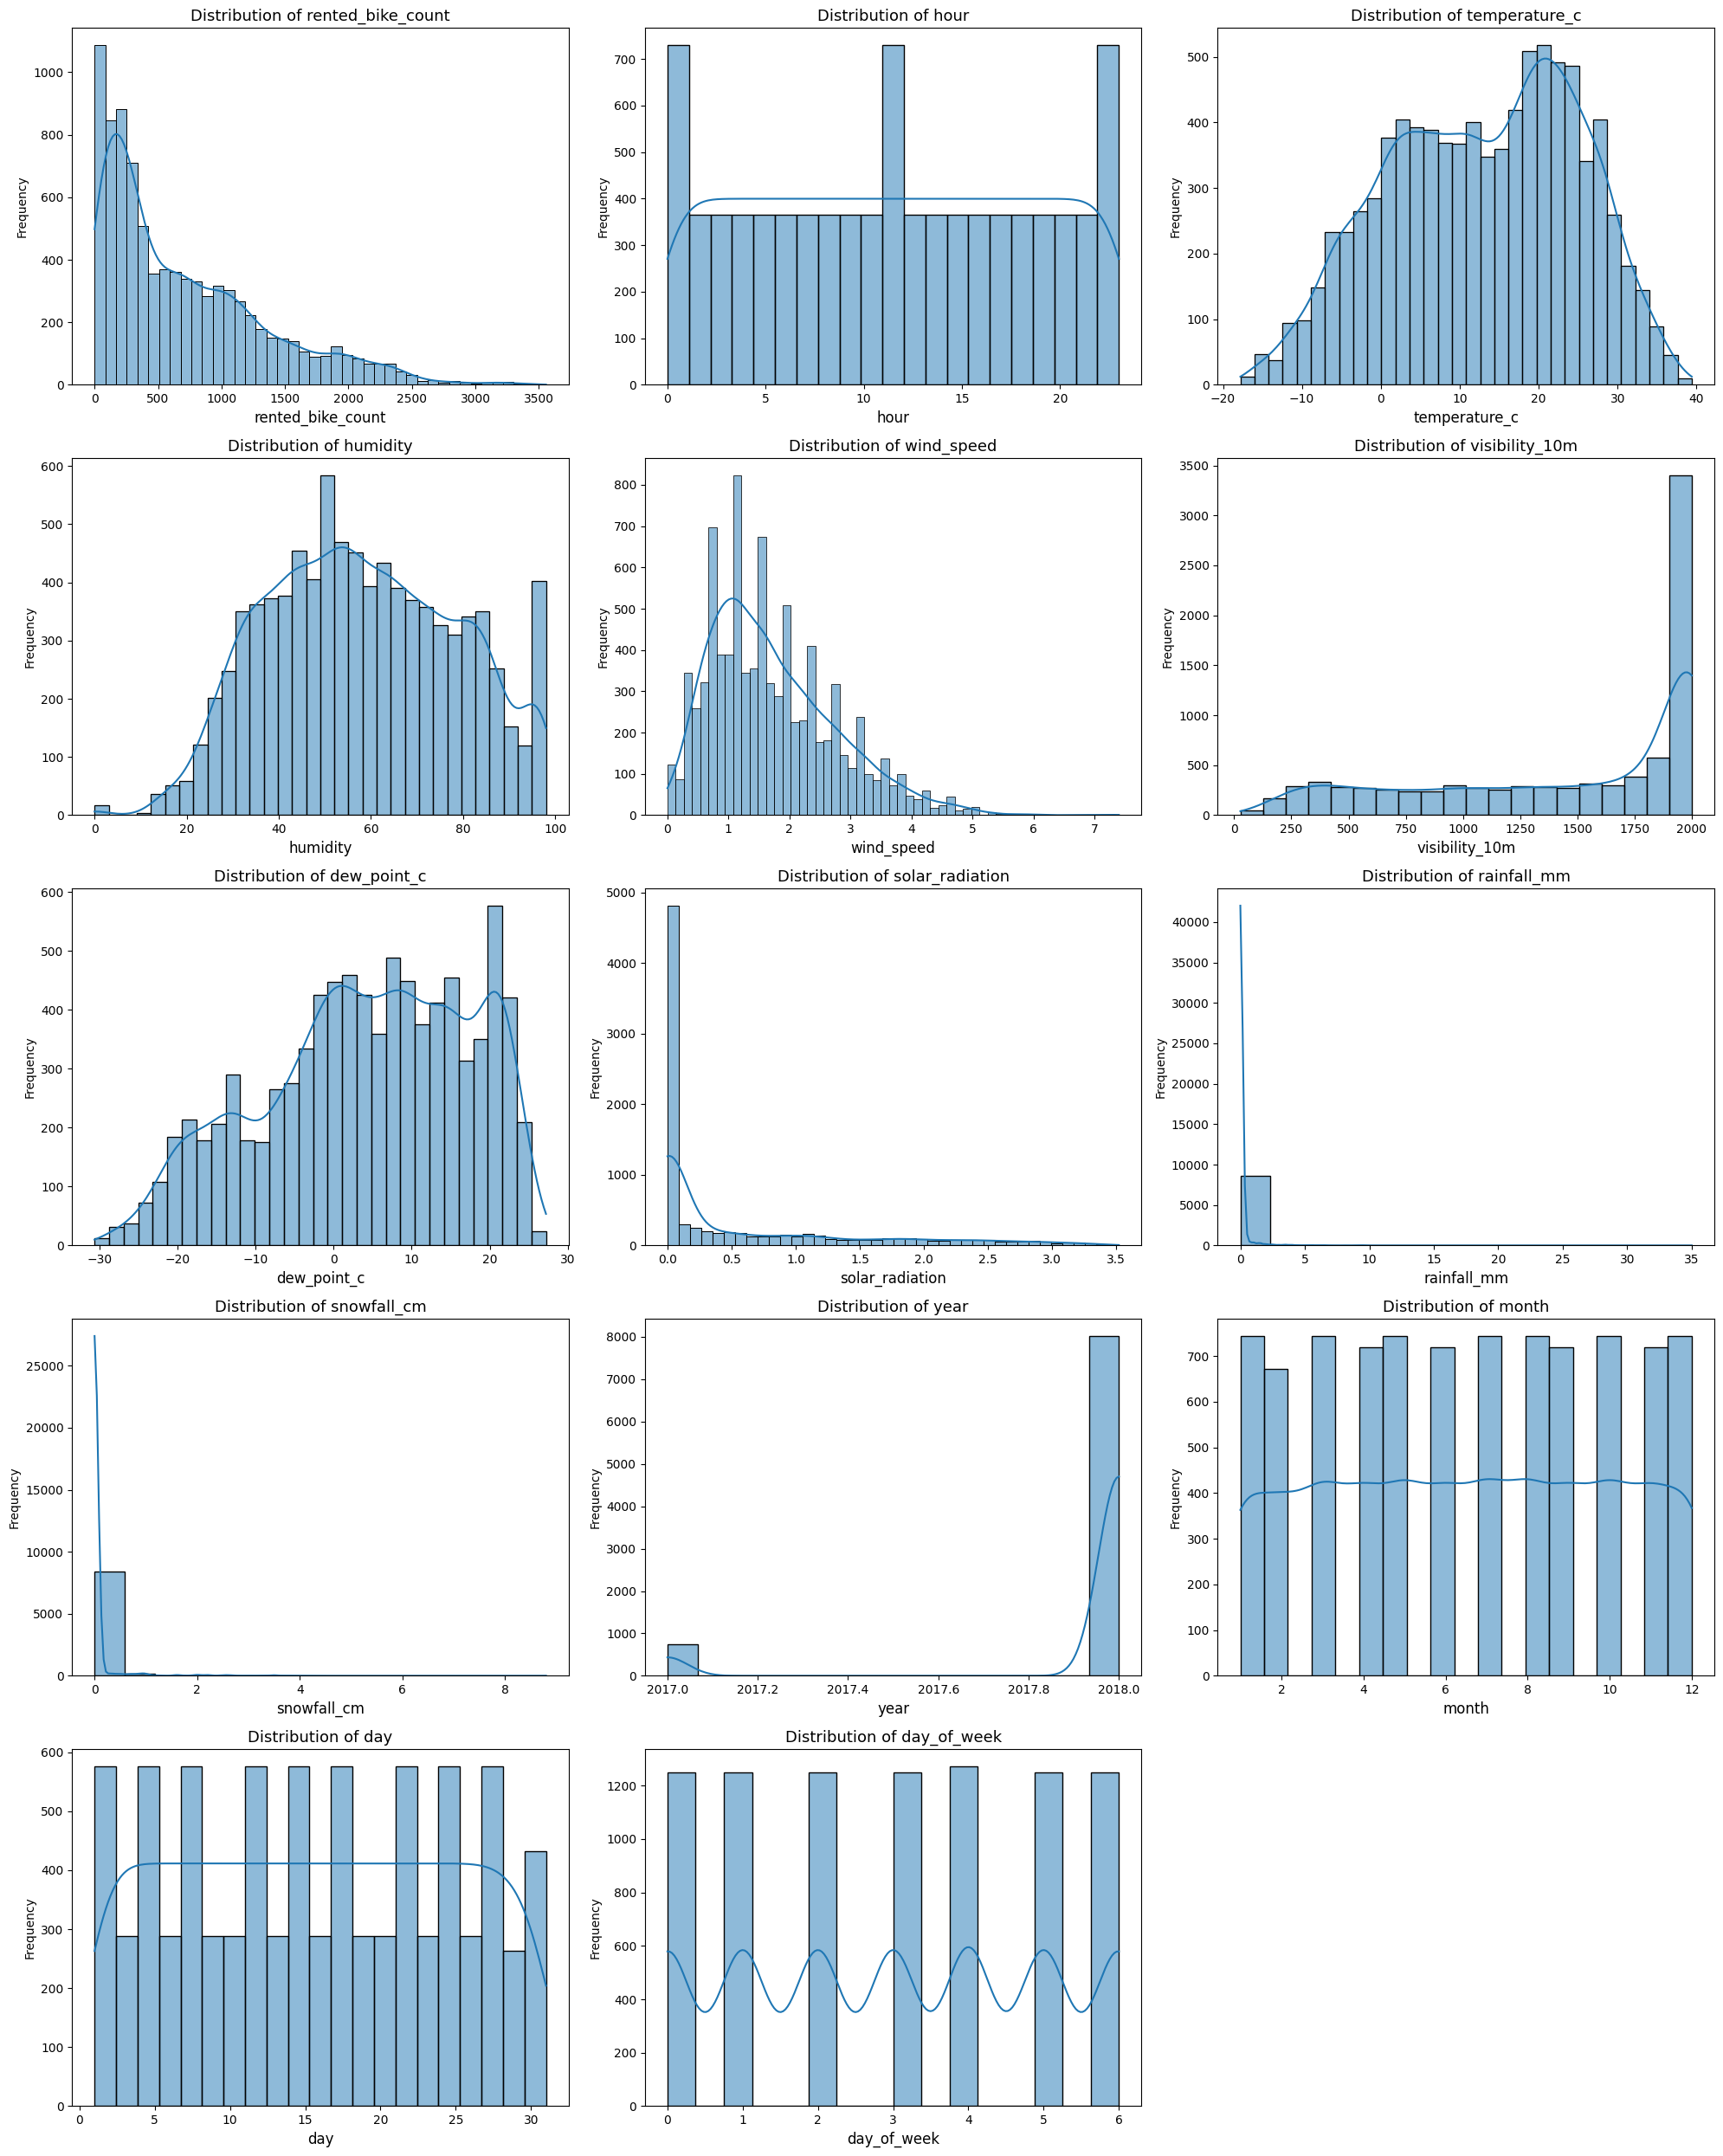

In [52]:
# Select all numerical columns
numerical_cols = df.select_dtypes(include='number').columns
# Calculate number of rows and columns for subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()
# Plot histograms for all numerical features
for idx,col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}', fontsize=13)
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].set_ylabel('Frequency', fontsize=10)
# Remove empty subplots if any
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout()
plt.show()

/tmp/ipykernel_24/1266825134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='rented_bike_count', data=df, estimator='mean', palette='Blues')


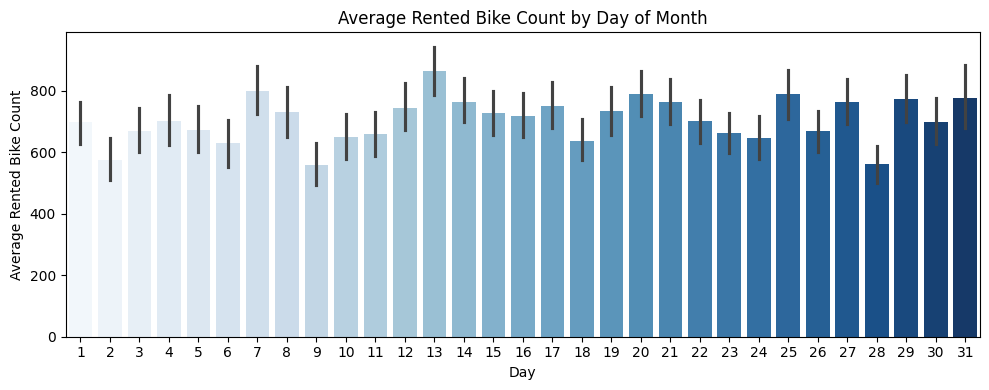

In [53]:
# By day
plt.figure(figsize=(10, 4))
sns.barplot(x='day', y='rented_bike_count', data=df, estimator='mean', palette='Blues')
plt.title('Average Rented Bike Count by Day of Month')
plt.xlabel('Day')
plt.ylabel('Average Rented Bike Count')
plt.tight_layout()
plt.show()

/tmp/ipykernel_24/3117456858.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='rented_bike_count', data=df, estimator='mean', palette='Purples')


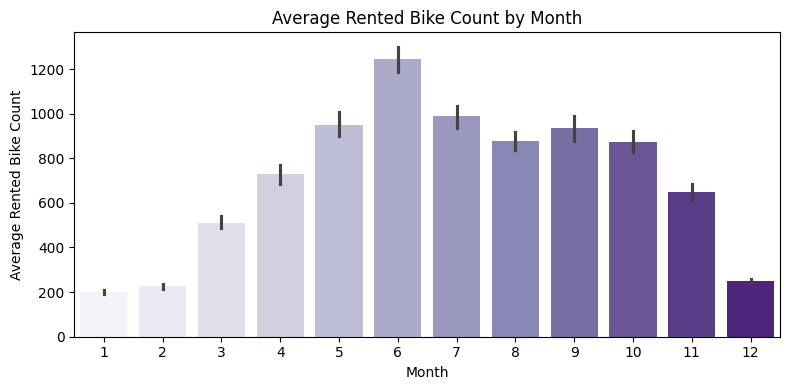

In [54]:
# By month
plt.figure(figsize=(8, 4))
sns.barplot(x='month', y='rented_bike_count', data=df, estimator='mean', palette='Purples')
plt.title('Average Rented Bike Count by Month')
plt.xlabel('Month')
plt.ylabel('Average Rented Bike Count')
plt.tight_layout()
plt.show()

/tmp/ipykernel_24/4196596293.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='rented_bike_count', data=df, estimator='mean', palette='Greens')


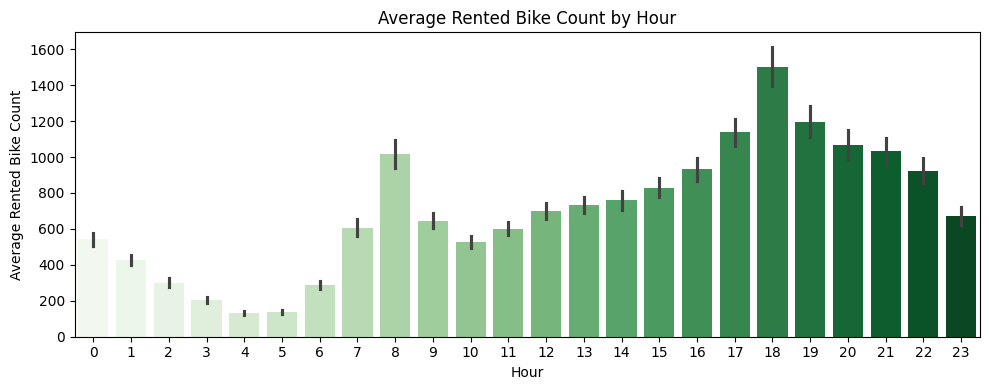

In [55]:
# By hour
plt.figure(figsize=(10, 4))
sns.barplot(x='hour', y='rented_bike_count', data=df, estimator='mean', palette='Greens')
plt.title('Average Rented Bike Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')
plt.tight_layout()
plt.show()

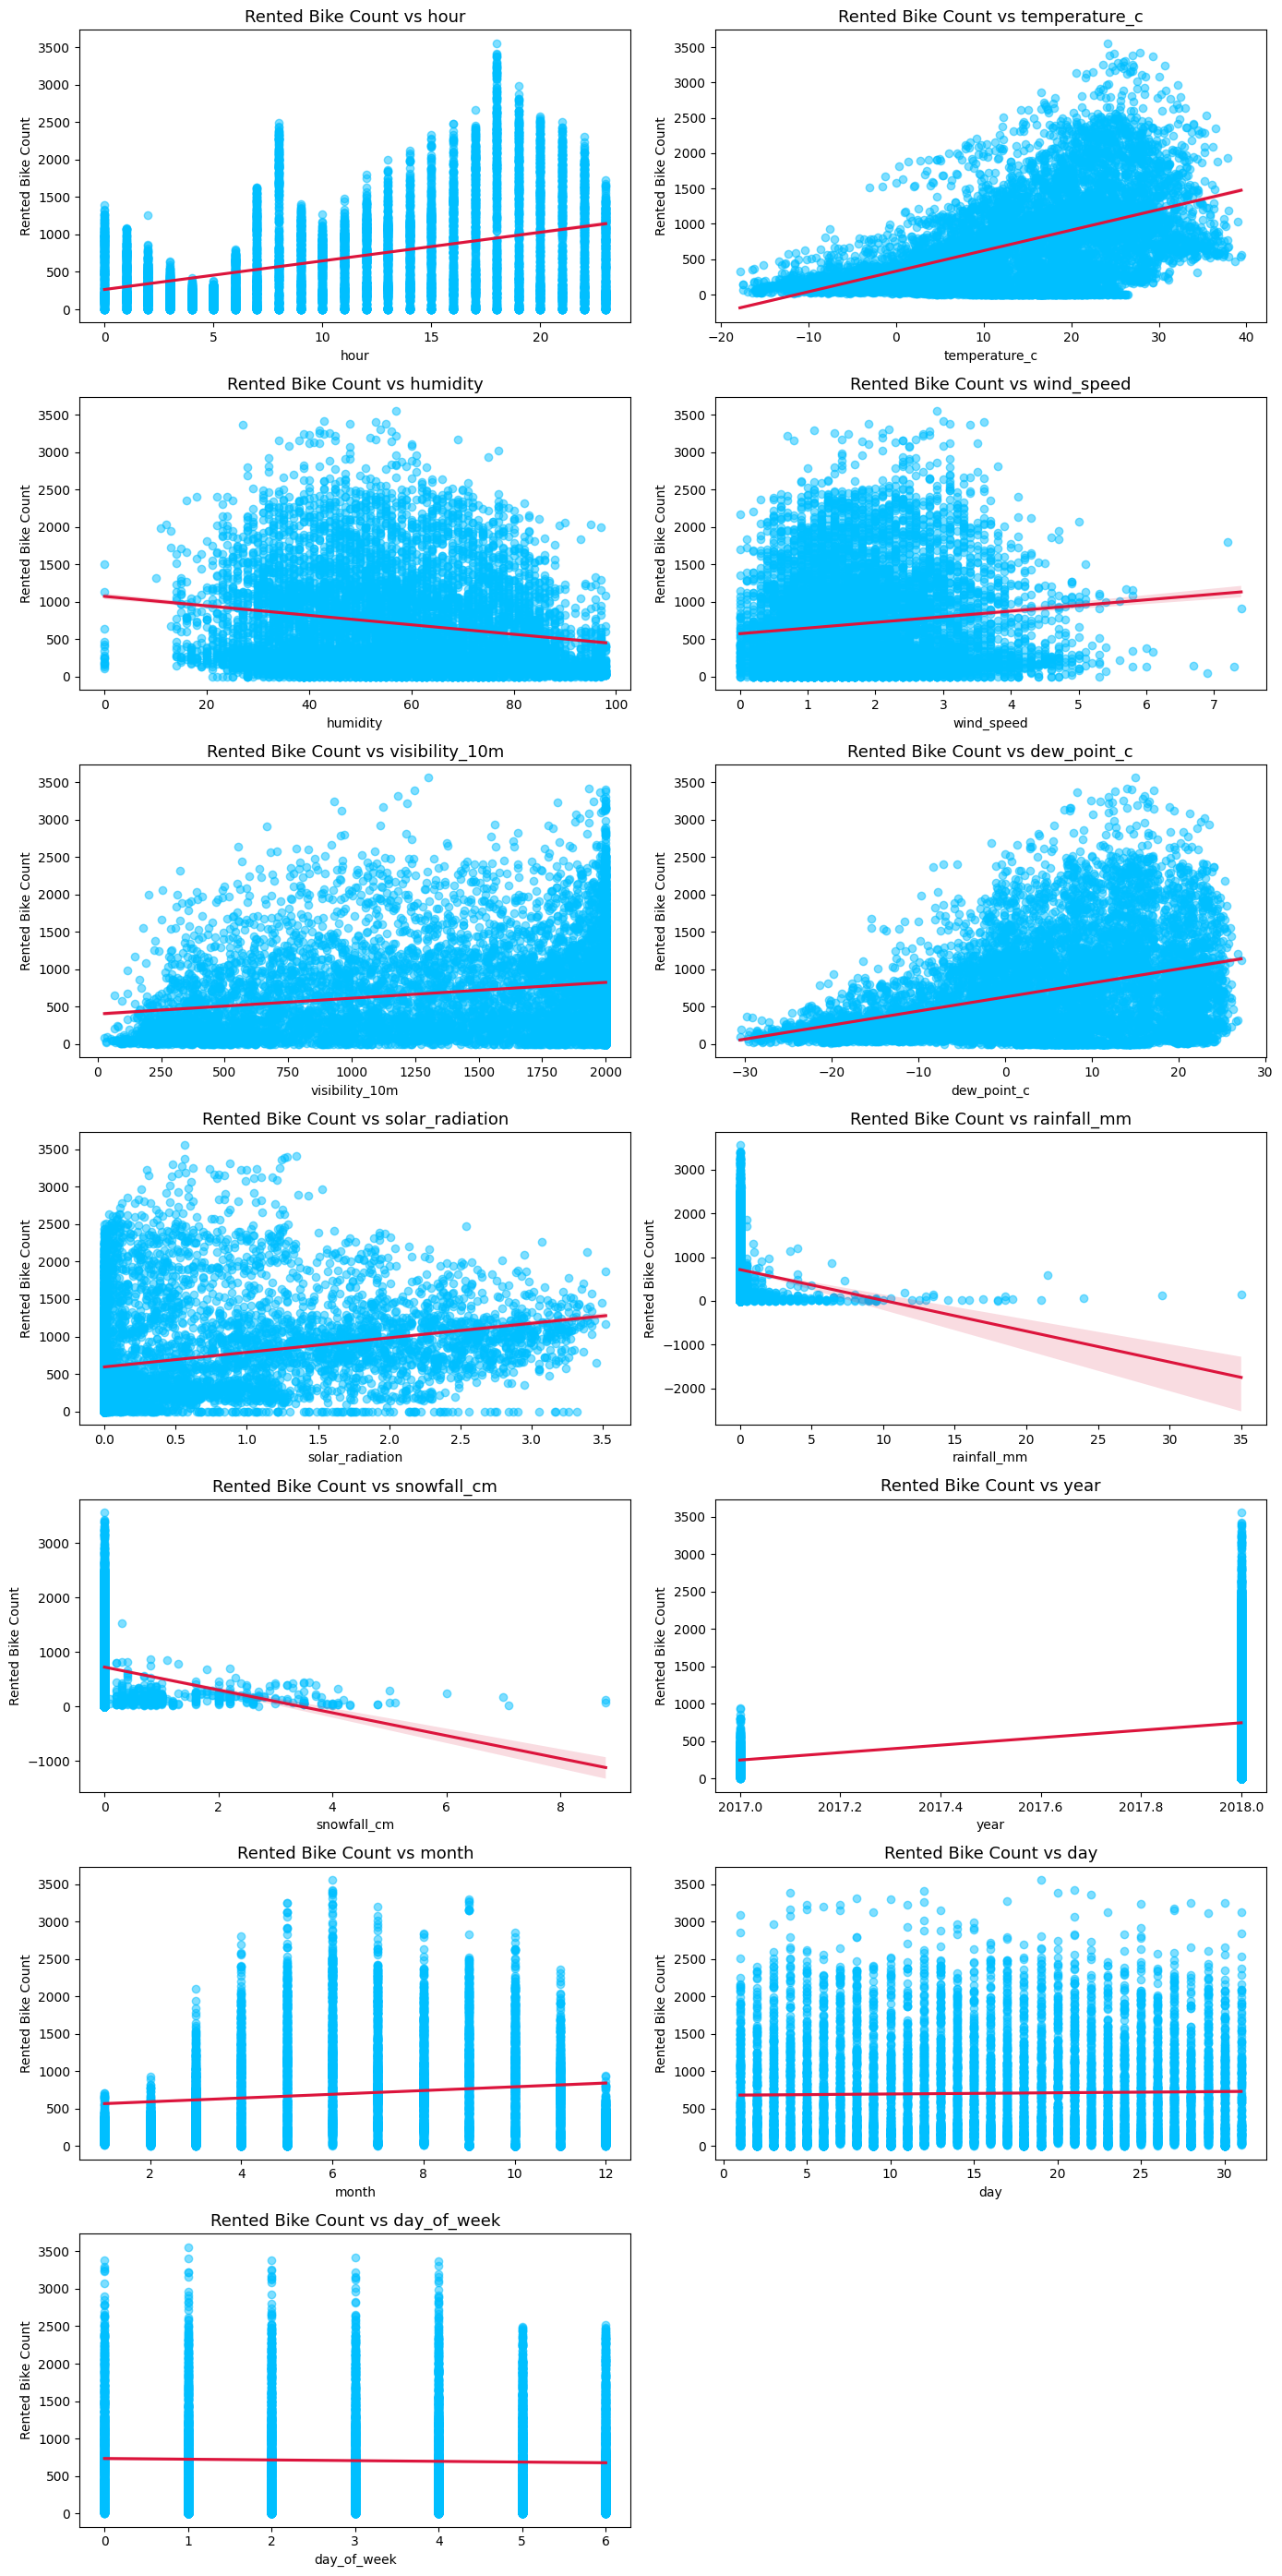

In [63]:
# List of numeric features, excluding the target
num_features=df.select_dtypes(include='number').columns.drop('rented_bike_count')
n_features = len(num_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols
plt.figure(figsize=(14, n_rows * 4))

for idx, feature in enumerate(num_features, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.regplot(
        x=df[feature], y=df['rented_bike_count'],
        scatter_kws={"color": "deepskyblue", "alpha": 0.5},
        line_kws={"color": "crimson"}
    )
    plt.title(f'Rented Bike Count vs {feature}', fontsize=13)
    plt.xlabel(feature)
    plt.ylabel('Rented Bike Count')

plt.tight_layout()
plt.show()
    